#### In this report, we are trying to achive crystal system and space group classification using pure X-ray diffraction data via machine learning approach. Necessary python libraries are imported first. Notebly, here we use sklearn based model to establish original machine learning model. In addition, GridSearchCV is involved to optimize hyperparameters within each model. To screen and evaluate best model with highest accuracy, 3 types of classification models are selected. Linear-based supervised machine learning model: LogisticRegression and SVM model. Clustter ensembling model: RandomForest and Adaboost. Neural Network model: Multi Layer Perceptron. What's more, we are trying to employ volting classifier to merge multiple models together to study synergistic effect of multi-model based classification.


In [1]:
#data processing
import time  
import os
import warnings
warnings.filterwarnings('ignore')
import itertools
import numpy as np
import pandas as pd
import tensorflow as tf

# visualization
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import classification_report, cohen_kappa_score, roc_auc_score
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

### Part1 Data Preparation and Model Training

In [2]:
#data loading and remove unnecessary column index
data=pd.read_csv('C:/Users/anshi/Desktop/nano281/lab3/data/cod_xrd_42k.csv',header=None)
Test=pd.read_csv('C:/Users/anshi/Desktop/nano281/lab3/data/test.csv',header=None)
data1=data.iloc[1:]
data1.head(10)

,0,1,2,3,4,5,6,7,8,9,...,174,175,176,177,178,179,180,181,182,183
1,H26C25N4ClO3F,2,2227539,aP,4.909847048222291e-137,2.993258003847605e-111,3.522733828136009e-88,8.003408706033912e-68,3.510182114016871e-50,2.971965685119351e-35,...,0.023087572208346268,0.03470161046711315,0.026240115052367056,0.018112677152580716,0.013301584321419636,0.01943209584729744,0.03018274253498323,0.01792259535015317,0.022856899978009926,0.006056703830570913
2,CoP3H36C23,2,4085709,aP,3.3916256736702194e-189,1.2351214695284974e-158,8.683022289037302e-131,1.1783970561129091e-105,3.087250502676185e-83,1.5613906675494182e-63,...,0.013113304862799295,0.01394778016454681,0.01540255338368422,0.01378661526772984,0.02263673724886634,0.021858884972270273,0.020877693697405397,0.028194846009904313,0.02273571935202447,0.014079356216551837
3,H34C34S2(N2O)3,2,2210818,aP,6.144994743224586e-218,5.954486105173294e-185,1.113849578233596e-154,4.02224287840651e-127,2.803945229831649e-102,3.773377444235225e-80,...,0.015220210645994606,0.012784898045865972,0.009240284757519177,0.013426332226241806,0.016861790459496533,0.02535214160778556,0.009457101150023196,0.008136538693339681,0.0067923851135896175,0.004124100972046004
4,P2H44Ru2C56N14Cl4O9.25F12,2,4312692,aP,4.146075234670375e-83,1.3978668895159648e-63,9.098167871772325e-47,1.143145632965874e-32,2.772736921587006e-21,1.2983005990880624e-12,...,0.006725776040262346,0.009491708355898012,0.011158401538297549,0.009486048490128369,0.009029170189152664,0.0137523993119171,0.0116070571917301,0.009644470200327366,0.0073570053747198765,0.0037940031355739533
5,H22C23SN2O3,2,2208064,aP,1.7606859769070014e-259,2.249971724353988e-223,5.550494842694082e-190,2.643296218774904e-159,2.4300737494983045e-131,4.312732896470867e-106,...,0.022190742703687424,0.02345911784677907,0.026702213365201927,0.018698767194779,0.01612335234325684,0.02044533134739693,0.021637896723685157,0.02263003674157023,0.027307441410596628,0.02011791429020566
6,CrBH64C36N8Cl,2,7012071,aP,2.5539568684619016e-124,6.695090303446718e-100,3.388120188237275e-78,3.3099441410526027e-59,6.242262239106458e-43,2.2725991638009368e-29,...,0.010953850133145496,0.010919959753545946,0.006817093533223525,0.008086716249913872,0.009701348346822984,0.009343126204603031,0.007334721281056535,0.0062561204741455705,0.008446701357729658,0.0036373146821231757
7,Eu2FeH24(C10O11)2,2,7008637,aP,5.686240833143902e-253,1.7384807717941228e-217,1.0260629868378293e-184,1.1690622572250651e-154,2.5713473422725404e-127,1.0918006290735117e-102,...,0.02867391436636088,0.031033803078047005,0.039057301998247564,0.03898704388860709,0.02507342093700117,0.03382186635663629,0.03045758542496152,0.029351036893752944,0.02673088180210378,0.009560489640962186
8,H14C12N3ClO,2,4028410,aP,9.045317999122451e-259,1.0703600344197437e-222,2.44531283634749e-189,1.0785819398103966e-158,9.185609731590592e-131,1.5105311861440632e-105,...,0.0058879323351490225,0.007809202343655805,0.008530364744848801,0.011710218456068544,0.013191126167859384,0.008141125582203772,0.007544759909944889,0.011308112774060576,0.008236930554108141,0.0016775081755523722
9,H8C10BrNO2,2,2101508,aP,0.0,0.0,0.0,0.0,3.640598962993535e-300,3.1131748648720986e-261,...,0.047728551371501074,0.03120793740024109,0.042555831837052326,0.06476668447641283,0.06995359625169179,0.0904456536047323,0.04204934287674289,0.03843552091578364,0.025166423778947004,0.008007778484757054
10,Ba2H38.6C28S2O27,2,7207581,aP,3.1396655305950556e-215,1.903032664796368e-182,2.229150167577769e-152,5.046614617008923e-125,2.208349974610127e-100,1.8680278849380114e-78,...,0.014810786653480854,0.01792716104257475,0.014655611969379846,0.00732172765073157,0.014516676653980674,0.01153828171294352,0.010333137458668049,0.009042307369004913,0.01295224715444796,0.00897608179695729


In [3]:
#X is XRD spectrum data Y is label for crystal structure
X=data1.iloc[:,4:]
Y=data1.iloc[:,3]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

##### Model training: Before we start to train the model, we first need to have a look at the crystal structure distribution in this data set. It is found that 14 types of crystal structures all presented in this dataset. Different types of crystal structure have different sample size. For instance, 'aP' type crystal has 4000 samples while 'oF' structure only have 406 samples. In order to avoid sampling imbalancing. We first categorize data into 14 groups and select 400 samples randomly in each group. So we have 400*14 = 5600 samples as sub-dataset to train our model. 100*14=1400 samples were selected for validation.

In [20]:
data_grouped = dict(tuple(data1.groupby(3)))
list_data_grouped = [data_grouped[x] for x in data_grouped]
print(list_data_grouped[0].shape)
print(list_data_grouped[1].shape)
print(list_data_grouped[2].shape)
print(list_data_grouped[3].shape)
print(list_data_grouped[4].shape)
print(list_data_grouped[5].shape)
print(list_data_grouped[6].shape)
print(list_data_grouped[7].shape)
print(list_data_grouped[8].shape)
print(list_data_grouped[9].shape)
print(list_data_grouped[10].shape)
print(list_data_grouped[11].shape)
print(list_data_grouped[12].shape)
print(list_data_grouped[13].shape)

(4000, 184)
(3613, 184)
(1242, 184)
(2161, 184)
(4000, 184)
(4000, 184)
(4000, 184)
(4000, 184)
(406, 184)
(889, 184)
(4000, 184)
(2496, 184)
(3337, 184)
(3670, 184)


In [21]:
aP_train=list_data_grouped[0].sample(n = 400)
aP_test=aP_train.sample(n = 100)

cF_train=list_data_grouped[1].sample(n = 400)
cF_test=cF_train.sample(n = 100)

cI_train=list_data_grouped[2].sample(n = 400)
cI_test=cI_train.sample(n = 100)

cP_train=list_data_grouped[3].sample(n = 400)
cP_test=cP_train.sample(n = 100)

hP_train=list_data_grouped[4].sample(n = 400)
hP_test=hP_train.sample(n = 100)

hR_train=list_data_grouped[5].sample(n = 400)
hR_test=hR_train.sample(n = 100)

mP_train=list_data_grouped[6].sample(n = 400)
mP_test=mP_train.sample(n = 100)

mS_train=list_data_grouped[7].sample(n = 400)
mS_test=mS_train.sample(n = 100)

oF_train=list_data_grouped[8].sample(n = 400)
oF_test=oF_train.sample(n = 100)

oI_train=list_data_grouped[9].sample(n = 400)
oI_test=oI_train.sample(n = 100)

oP_train=list_data_grouped[10].sample(n = 400)
oP_test=oP_train.sample(n = 100)

oS_train=list_data_grouped[11].sample(n = 400)
oS_test=oS_train.sample(n = 100)

tI_train=list_data_grouped[12].sample(n = 400)
tI_test=tI_train.sample(n = 100)

tP_train=list_data_grouped[13].sample(n = 400)
tP_test=tP_train.sample(n = 100)

train=aP_train.append(cF_train).append(cI_train).append(cP_train).append(hP_train).append(hR_train).append(mP_train).append(mS_train).append(oF_train).append(oI_train).append(oP_train).append(oS_train).append(tI_train).append(tP_train)
test=aP_test.append(cF_test).append(cI_test).append(cP_test).append(hP_test).append(hR_test).append(mP_test).append(mS_test).append(oF_test).append(oI_test).append(oP_test).append(oS_test).append(tI_test).append(tP_test)


In [22]:
X_train=train.iloc[:,4:]
X_test=test.iloc[:,4:]
Y_train=train.iloc[:,3]
Y_test=test.iloc[:,3]
feature = [x*0.5 for x in range(1,181)]
feature=np.array(feature, dtype=float) 
feature.shape
print('Training feature and label dimension==>>',X_train.shape, Y_train.shape)
print('Test feature and label dimension==>>',X_test.shape, Y_test.shape)

Training feature and label dimension==>> (5600, 180) (5600,)
Test feature and label dimension==>> (1400, 180) (1400,)


In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

##### Linear based models are first employed to perform classification due to their quickly running time. 

LogistisRegression and SVM model were introduced. GridSearchCV is imported to tune all the selected parameters.

LogisticRegression: Tuned Parameter {'penalty': ['l1','l2'], 'C': [0.01,0.1,1,10],'solver':['newton-cg', 'lbfgs','liblinear','sag']}
Best performance parameter:{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Model performance for our sub-dataset:
Training Accuracy : 0.32160714285714287
Validation Accuracy : 0.31357142857142856

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}

Grid scores on development set:

nan (+/-nan) for {'C': 0.01, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (+/-nan) for {'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}
0.005 (+/-0.000) for {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 0.01, 'penalty': 'l1', 'solver': 'sag'}
0.196 (+/-0.011) for {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.196 (+/-0.011) for {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.182 (+/-0.019) for {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.196 (+/-0.011) for {'C': 0.01, 'penalty': 'l2', 'solver': 'sag'}
nan (+/-nan) for {'C': 0.1, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (+/-nan) for {'C': 0.1, 'penalty': 'l1', 'solver': 'lbfgs'}
0.155 (+/-0.081) for {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 0.1, 'penalty': 'l1', 'solver': 'sag'}
0.202 (+/-0.011

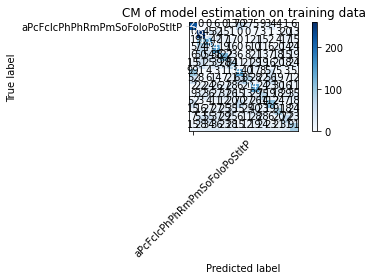


# Tuning hyper-parameters for recall



KeyboardInterrupt: 

In [24]:
#LogisticRegression Parameter Tuning
tuned_parameters = [{'penalty': ['l1','l2'], 'C': [0.01,0.1,1,10],'solver':['newton-cg', 'lbfgs','liblinear','sag']}]

scores = ['precision', 'recall']
classes = ['aP' 'cF' 'cI' 'cP' 'hP' 'hR' 'mP' 'mS' 'oF' 'oI' 'oP' 'oS' 'tI' 'tP']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(LogisticRegression(random_state=0), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, Y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    # evaluate model on same training set
    Y_true, Y_pred = Y_train, clf.predict(X_train)
    print(classification_report(Y_true, Y_pred))
    
    cm = confusion_matrix(Y_true, Y_pred)
    plt.figure()
    plot_confusion_matrix(cm, classes=classes,# normalize=True
                          title='CM of model estimation on training data')
    plt.show()
    print()

In [25]:
#LogisticRegression Evaluation
clf = LogisticRegression(C=1, penalty='l2', solver= 'lbfgs',random_state=0)
clf.fit(X_train, Y_train)

# evaluate model on same training set
Y_true, Y_pred = Y_train, clf.predict(X_train)
Y_true = pd.DataFrame(Y_train)
Y_pred = pd.DataFrame(data=Y_pred)
YPre=Y_pred[0].to_list()
Y_true['pre']=YPre
print(Y_true)
print("Training Accuracy :", clf.score(X_train, Y_train))
print("Validation Accuracy :", clf.score(X_test, Y_test))

        3 pre
1020   aP  cP
1467   aP  mP
1496   aP  aP
827    aP  mS
3019   aP  mP
...    ..  ..
38727  tP  aP
39167  tP  aP
41387  tP  tI
41363  tP  oP
41200  tP  oS

[5600 rows x 2 columns]
Training Accuracy : 0.32160714285714287
Validation Accuracy : 0.31357142857142856


##### SVM: Tuned Parameter:  
[{'kernel': ['rbf', 'linear', 'sigmoid'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 20]}]
Best performance parameter: {'C': 20, 'gamma': 0.001, 'kernel': 'linear'}
Model performance for our sub-dataset:
Training Accuracy : 0.4419642857142857
Validation Accuracy : 0.4257142857142857

In [ ]:
#SVM Parameter Tuning
tuned_parameters = [
    {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 20]},
    {'kernel': ['linear'],'gamma': [1e-3, 1e-4], 'C': [1, 10, 20]},
    {'kernel': ['sigmoid'],'gamma': [1e-3, 1e-4], 'C': [1, 10, 20]}
    ]

scores = ['precision', 'recall']
classes = ['aP' 'cF' 'cI' 'cP' 'hP' 'hR' 'mP' 'mS' 'oF' 'oI' 'oP' 'oS' 'tI' 'tP']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, Y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    
    # evaluate model on same training set
    Y_true, Y_pred = Y_train, clf.predict(X_train)
    
    print(classification_report(Y_true, Y_pred))
    cm = confusion_matrix(Y_true, Y_pred)
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cm, classes=classes,# normalize=True
                          title='CM of model estimation on training data')
    plt.show()
    print()

In [26]:
#SVM Evaluation
clf = SVC(C=20, gamma=0.001,kernel='linear')
clf.fit(X_train, Y_train)

# evaluate model on same training set
Y_true, Y_pred = Y_train, clf.predict(X_train)
Y_true = pd.DataFrame(Y_train)
Y_pred = pd.DataFrame(data=Y_pred)
YPre=Y_pred[0].to_list()
Y_true['pre']=YPre
print(Y_true)
print("Training Accuracy :", clf.score(X_train, Y_train))
print("Validation Accuracy :", clf.score(X_test, Y_test))

        3 pre
1020   aP  aP
1467   aP  mP
1496   aP  aP
827    aP  aP
3019   aP  mP
...    ..  ..
38727  tP  aP
39167  tP  aP
41387  tP  tI
41363  tP  oP
41200  tP  oS

[5600 rows x 2 columns]
Training Accuracy : 0.4419642857142857
Validation Accuracy : 0.4257142857142857


#### All the GridSearchCV parameters tuning are the same procedure. So I will not paste all the repeating content. Instead, I will show the training results for our best model.

###### Since we took 180 XRD data points from 0.5 degree to 90 degree as features. All the signals are obtained due to materials intrinsic properties. So it is hard to say there are certain linear relationship between 2theta degree and crystal structures. Thus, linear model can't satisfy our demanding of classification task. That's why we got low accuracy using linear model. 

###### However, Cluster ensembles seem to be a good solution to categories 14 crystal structure based on spectrum similarity. Thus, we selected two ensemble model to train our data.

###### RandomForest: Tuned Parameters:
{'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [100,200,300,400],'max_depth': [20, 40, 60, 80, 100, None]}
Best performance: {'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 400}
Model performance for our sub-dataset:
Training Accuracy : 1.0
Validation Accuracy : 1.0
It looks perfect for RandomForest with 1.0 accuracy for both training and validation. However, this extremely high accuracy might be ascribed to overfitting in such a small dataset.

In [27]:
#RandomForest
clf = RandomForestClassifier(oob_score = True,bootstrap=True, max_depth=30, max_features='sqrt',n_estimators=400)
clf.fit(X_train, Y_train)

# evaluate model on same training set
Y_true, Y_pred = Y_train, clf.predict(X_train)
Y_true = pd.DataFrame(Y_train)
Y_pred = pd.DataFrame(data=Y_pred)
YPre=Y_pred[0].to_list()
Y_true['pre']=YPre
print(Y_true)
print("Training Accuracy :", clf.score(X_train, Y_train))
print("Validation Accuracy :", clf.score(X_test, Y_test))

        3 pre
1020   aP  aP
1467   aP  aP
1496   aP  aP
827    aP  aP
3019   aP  aP
...    ..  ..
38727  tP  tP
39167  tP  tP
41387  tP  tP
41363  tP  tP
41200  tP  tP

[5600 rows x 2 columns]
Training Accuracy : 1.0
Validation Accuracy : 1.0


##### Adaboost: Tuned Parameters:
{'n_estimators': [100,200,300],'learning_rate':[0.1,1,10]}
Best Performance parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Model performance for our sub-dataset:
Training Accuracy : 0.22089285714285714
Validation Accuracy : 0.23      

In [28]:
clf = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)
clf.fit(X_train, Y_train)

# evaluate model on same training set
Y_true, Y_pred = Y_train, clf.predict(X_train)
Y_true = pd.DataFrame(Y_train)
Y_pred = pd.DataFrame(data=Y_pred)
YPre=Y_pred[0].to_list()
Y_true['pre']=YPre
print(Y_true)
print("Training Accuracy :", clf.score(X_train, Y_train))
print("Validation Accuracy :", clf.score(X_test, Y_test))

        3 pre
1020   aP  mS
1467   aP  mS
1496   aP  mP
827    aP  mP
3019   aP  mP
...    ..  ..
38727  tP  mP
39167  tP  oS
41387  tP  tI
41363  tP  mP
41200  tP  tI

[5600 rows x 2 columns]
Training Accuracy : 0.22089285714285714
Validation Accuracy : 0.23


###### Deep learning method was also emoployed to study crystal classification. Multi-Layer Perceptron model and CNN model was carefully trained.
Tuned Parameters:
'hidden_layer_sizes':{(128,128,128), (256,256,256), (512,512,512), (512,512), (512,512,512,512)} --- Best: (512,512,512)
'activation': {'identity', 'logistic', 'tanh', 'relu'} --- Best: 'relu'
'solver':{'lbfgs', 'sgd', 'adam'} ---Best: 'sgd'
'learning_rate_init':{[0.001, 0.01, 0.1, 1, 10]} --- Best: 0.1
'max_iter': {[100, 200, 300, 400]} --- Best: 100
'alpha': {[0.01, 0.05, 0.1]} --- Best: 0.01
Best parameters summary: {'hidden_layer_sizes':(512,512,512), 'learning_rate_init':0.1, 'random_state':1, 'alpha':0.01, 'max_iter':100, 'solver':'sgd', 'activation':'relu'}
Model performance for our sub-dataset:
Training Accuracy : 0.6032142857142857
Validation Accuracy : 0.6035714285714285

In [29]:
#MLP
clf = MLPClassifier(hidden_layer_sizes=(512,512,512),learning_rate_init=0.1,random_state=1, alpha=0.01, max_iter=100,solver='sgd',activation='relu')
clf.fit(X_train, Y_train)

# evaluate model on same training set
Y_true, Y_pred = Y_train, clf.predict(X_train)
Y_true = pd.DataFrame(Y_train)
Y_pred = pd.DataFrame(data=Y_pred)
YPre=Y_pred[0].to_list()
Y_true['pre']=YPre
print(Y_true)
print("Training Accuracy :", clf.score(X_train, Y_train))
print("Validation Accuracy :", clf.score(X_test, Y_test))

        3 pre
1020   aP  aP
1467   aP  aP
1496   aP  aP
827    aP  aP
3019   aP  aP
...    ..  ..
38727  tP  tP
39167  tP  tP
41387  tP  tP
41363  tP  tP
41200  tP  tP

[5600 rows x 2 columns]
Training Accuracy : 0.9933928571428572
Validation Accuracy : 0.9892857142857143


In [187]:
#CNN
from tensorflow.keras.layers import GlobalAveragePooling1D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout, Activation, Dense, Flatten
from tensorflow.keras.layers import Convolution1D,AveragePooling1D,MaxPooling1D, Reshape, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
data=pd.read_csv('C:/Users/anshi/Desktop/nano281/lab3/data/cod_xrd_42k.csv',header=None)
Test=pd.read_csv('C:/Users/anshi/Desktop/nano281/lab3/data/test.csv',header=None)
data1=data.iloc[1:]
Test1=Test.iloc[1:]
data2=data1.sample(5000)
feature=data2.iloc[:,4:]
label=data2.iloc[:,3]
min_max_scaler = preprocessing.MinMaxScaler()
feature = min_max_scaler.fit_transform(feature)
le = preprocessing.LabelEncoder()
le.fit(label)
print('label classes ==>>',le.classes_)
label = le.transform(label)
x1_train, x1_validation, Y_train, Y_validation = train_test_split(feature, label, test_size=0.2, random_state=42)
Y_train = to_categorical(Y_train, 14)
Y_validation = to_categorical(Y_validation, 14)

label classes ==>> ['aP' 'cF' 'cI' 'cP' 'hP' 'hR' 'mP' 'mS' 'oF' 'oI' 'oP' 'oS' 'tI' 'tP']


In [185]:
#CNN model followed by VGG16 with one-dimensional version
model = Sequential()
model.add(Embedding(input_dim=4000,output_dim=14,input_length=180))

model.add(Convolution1D(filters=6,kernel_size=3,padding='valid',activation='relu',strides=1))
model.add(MaxPooling1D())
model.add(Dropout(0.2))


model.add(Convolution1D(filters=16,kernel_size=3,padding='valid',activation='relu',strides=1))
model.add(Convolution1D(filters=16,kernel_size=3,padding='valid',activation='relu',strides=1))
model.add(MaxPooling1D())
model.add(Dropout(0.2))


model.add(Convolution1D(filters=32,kernel_size=3,padding='valid',activation='relu',strides=1))
model.add(Convolution1D(filters=32,kernel_size=3,padding='valid',activation='relu',strides=1))
model.add(MaxPooling1D())
model.add(Dropout(0.2))


model.add(Convolution1D(filters=64,kernel_size=3,padding='valid',activation='relu',strides=1))
model.add(Convolution1D(filters=64,kernel_size=3,padding='valid',activation='relu',strides=1))
model.add(MaxPooling1D())
model.add(Dropout(0.2))

          
model.add(Convolution1D(filters=128,kernel_size=3,padding='valid',activation='relu',strides=1))

model.add(Dense(units=120,activation="relu"))
model.add(Dense(units=80,activation="relu"))
model.add(Dense(units=14, activation="softmax"))

model.add(Dropout(0.20))
model.add(Convolution1D(14, 1))
model.add(GlobalAveragePooling1D())

model.add(Activation('softmax', name='loss'))
opt = Adam(learning_rate=0.01)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

print(model.summary())
print("CNN Model created.")

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 180, 14)           56000     
_________________________________________________________________
conv1d_45 (Conv1D)           (None, 178, 6)            258       
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 89, 6)             0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 89, 6)             0         
_________________________________________________________________
conv1d_46 (Conv1D)           (None, 87, 16)            304       
_________________________________________________________________
conv1d_47 (Conv1D)           (None, 85, 16)            784       
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 42, 16)           

In [188]:
history  = model.fit(x1_train,Y_train, epochs = 50, batch_size = 32, validation_data = (x1_validation,Y_validation))

Epoch 1/50
125/125 [==============================] - 2s 14ms/step - loss: 2.5501 - accuracy: 0.0993 - val_loss: 2.5431 - val_accuracy: 0.0740
Epoch 2/50
125/125 [==============================] - 2s 16ms/step - loss: 2.5273 - accuracy: 0.0948 - val_loss: 2.5400 - val_accuracy: 0.0740
Epoch 3/50
125/125 [==============================] - 2s 17ms/step - loss: 2.5280 - accuracy: 0.0945 - val_loss: 2.5447 - val_accuracy: 0.0740
Epoch 4/50
125/125 [==============================] - 2s 16ms/step - loss: 2.5297 - accuracy: 0.0945 - val_loss: 2.5427 - val_accuracy: 0.0740
Epoch 5/50
125/125 [==============================] - 2s 14ms/step - loss: 2.5270 - accuracy: 0.0965 - val_loss: 2.5439 - val_accuracy: 0.0740
Epoch 6/50
125/125 [==============================] - 2s 14ms/step - loss: 2.5260 - accuracy: 0.0980 - val_loss: 2.5476 - val_accuracy: 0.0740
Epoch 7/50
125/125 [==============================] - 2s 13ms/step - loss: 2.5259 - accuracy: 0.0990 - val_loss: 2.5416 - val_accuracy: 0.1000

###### MLP-based deep learning model exhibits superb performance while CNN model (VGG16-like architecture) shows extremely low accuracy

##### We could clearly notice that only RandomForest and MLP model have relatively high accuracy. Rest of models have poor performance. We then apply these optimized model to whole dataset. All the results are shown below. It is predictable that RandomForest and MLP have better performance than other models. RandomForest has highest validation accuracy with 0.536 score. In order to improve our model performance, we involve class-volting algorithm to merge RandomForest and MLP models. However, the class-volting accuracy decreased, which might ascribed to different classification mechanisms behind these two models.

### Part 2 Model evaluation for overall dataset

###### In the above section, we use small dataset to train and optimize all types of model using GridSearchCV. Next, we apply all the prepared model to take prediction of overall dataset.

In [13]:
#RandomForest
clf1 = RandomForestClassifier(bootstrap=True,min_samples_leaf=1, max_depth=30, max_features='sqrt',min_samples_split=4, n_estimators=600)
clf1.fit(x_train, y_train)
print("Training Accuracy :", clf1.score(x_train, y_train))
print("Validation Accuracy :", clf1.score(x_test, y_test))

Training Accuracy : 0.9997858290201678
Validation Accuracy : 0.5446046814986594


In [10]:
#ExtraTree
from sklearn.ensemble import ExtraTreesClassifier
cl=ExtraTreesClassifier(n_estimators=500, max_depth=30, max_features=10, n_jobs=-1, warm_start=False)
cl.fit(x_train, y_train)
print("Training Accuracy :", cl.score(x_train, y_train))
print("Validation Accuracy :", cl.score(x_test, y_test))

Training Accuracy : 0.9927181866857041
Validation Accuracy : 0.487354156098268


In [88]:
#MLP
clf2 = MLPClassifier(hidden_layer_sizes=(512,512,512), learning_rate_init=0.1, random_state=1, alpha=0.01, max_iter=100, solver='sgd', activation='relu')
clf2.fit(x_train, y_train)
print("Training Accuracy :", clf2.score(x_train, y_train))
print("Validation Accuracy :", clf2.score(x_test, y_test))

Training Accuracy : 0.9075852222023916
Validation Accuracy : 0.4251032683527792


In [8]:
#AdaBoost
clf3 = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)
clf3.fit(x_train, y_train)
print("Training Accuracy :", clf3.score(x_train, y_train))
print("Validation Accuracy :", clf3.score(x_test, y_test))

Training Accuracy : 0.2847403176869534
Validation Accuracy : 0.2825567070077542


In [9]:
#SVM
clf4 = SVC(C=20, gamma=0.001, kernel='linear')
clf4.fit(x_train, y_train)
print("Training Accuracy :", clf4.score(x_train, y_train))
print("Validation Accuracy :", clf4.score(x_test, y_test))

Training Accuracy : 0.33485632696769585
Validation Accuracy : 0.3077034567722299


In [10]:
#LogisticRegression
clf5 = LogisticRegression(C=1, penalty='l2', solver= 'lbfgs',random_state=0)
clf5.fit(x_train, y_train)
print("Training Accuracy :", clf5.score(x_train, y_train))
print("Validation Accuracy :", clf5.score(x_test, y_test))

Training Accuracy : 0.3130108870248081
Validation Accuracy : 0.29639828973113996


In [13]:
#Volting FOR RandomForest and MLP
clf6 = VotingClassifier(estimators=[('rf', clf1), ('mlp', clf2)])
clf6.fit(x_train, y_train)
print("Training Accuracy :", clf4.score(x_train, y_train))
print("Validation Accuracy :", clf4.score(x_test, y_test))

Training Accuracy : 0.33485632696769585
Validation Accuracy : 0.3077034567722299


In [89]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100)
model.fit(x_train, y_train)
print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.5801534892022131
Validation Accuracy : 0.41850858757881004


In [90]:
#DecisionTree
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train)
print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Validation Accuracy : 0.37770852960359447


###### In general, Ensembling method exhibit best performance comparatively. The overall ranking based on accuracy:
RandomForest > ExtraTree > MLP > GradientBoosting > DecisionTree > SVM > AdaBoost > CNN > LogisticRegression

###### Best 3 model after trained and optimized:
Model1: RandomForestClassifier(oob_score = True,bootstrap=True, max_depth=30, max_features='sqrt',n_estimators=600)
Model2: ExtraTreesClassifier(n_estimators=500, max_depth=30, max_features=10, n_jobs=-1, warm_start=False)
Model3: MLPClassifier(hidden_layer_sizes=(512,512,512), learning_rate_init=0.1, random_state=1, alpha=0.01, max_iter=100, solver='sgd', activation='relu')

### Part 3 Feature Pruning for model improvement

##### To further improve our model performance, my intention is to decrease unuseful/unimportant/noise-like features to achive feature pruning. This method is widely used to decrease overfitting issues. My first trial is to keep top 20 highest significant data point and leave others to set as 0. For example, if we set N=30, only top 30 numerical data will be saved and 5/6 data discarded (set as 0. We study the accuracy for RandomForest model and MLP model with 1/6, 2/6, 3/6, 4/6, 5/6 kept data.

In [230]:
N = 30
X2 = X.mask(X.rank(axis=1, method='min', ascending=False) > N, 0)
X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.33, random_state=42)
clf1.fit(X2_train, Y_train)
print("Training Accuracy for RF:", clf1.score(X2_train, Y_train))
print("Validation Accuracy for RF :", clf1.score(X2_test, Y_test))
clf2.fit(X2_train, Y_train)
print("Training Accuracy for MLP:", clf2.score(X2_train, Y_train))
print("Validation Accuracy for MLP:", clf2.score(X2_test, Y_test))

Training Accuracy for RF: 0.9968231304658218
Validation Accuracy for RF : 0.5482281324733677
Training Accuracy for MLP: 0.9302159557379975
Validation Accuracy for MLP: 0.4815566345387347


In [47]:
N = 60
X2 = X.mask(X.rank(axis=1, method='min', ascending=False) > N, 0)
X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.33, random_state=42)
clf1.fit(X2_train, Y_train)
print("Training Accuracy for RF:", clf1.score(X2_train, Y_train))
print("Validation Accuracy for RF :", clf1.score(X2_test, Y_test))
clf2.fit(X2_train, Y_train)
print("Training Accuracy for MLP:", clf2.score(X2_train, Y_train))
print("Validation Accuracy for MLP:", clf2.score(X2_test, Y_test))

Training Accuracy for RF: 1.0
Validation Accuracy for RF : 0.5519965214870642
Training Accuracy for MLP: 0.8913082277351418
Validation Accuracy for MLP: 0.4383650989202116


In [48]:
N = 90
X2 = X.mask(X.rank(axis=1, method='min', ascending=False) > N, 0)
X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.33, random_state=42)
clf1.fit(X2_train, Y_train)
print("Training Accuracy for RF:", clf1.score(X2_train, Y_train))
print("Validation Accuracy for RF :", clf1.score(X2_test, Y_test))
clf2.fit(X2_train, Y_train)
print("Training Accuracy for MLP:", clf2.score(X2_train, Y_train))
print("Validation Accuracy for MLP:", clf2.score(X2_test, Y_test))

Training Accuracy for RF: 1.0
Validation Accuracy for RF : 0.5493876367852742
Training Accuracy for MLP: 0.9765482777083705
Validation Accuracy for MLP: 0.48554243061091384


In [49]:
N = 120
X2 = X.mask(X.rank(axis=1, method='min', ascending=False) > N, 0)
X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.33, random_state=42)
clf1.fit(X2_train, Y_train)
print("Training Accuracy for RF:", clf1.score(X2_train, Y_train))
print("Validation Accuracy for RF :", clf1.score(X2_test, Y_test))
clf2.fit(X2_train, Y_train)
print("Training Accuracy for MLP:", clf2.score(X2_train, Y_train))
print("Validation Accuracy for MLP:", clf2.score(X2_test, Y_test))

Training Accuracy for RF: 1.0
Validation Accuracy for RF : 0.55888107833901
Training Accuracy for MLP: 0.9490273067999286
Validation Accuracy for MLP: 0.4760489890571781


In [50]:
N = 150
X2 = X.mask(X.rank(axis=1, method='min', ascending=False) > N, 0)
X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.33, random_state=42)
clf1.fit(X2_train, Y_train)
print("Training Accuracy for RF:", clf1.score(X2_train, Y_train))
print("Validation Accuracy for RF :", clf1.score(X2_test, Y_test))
clf2.fit(X2_train, Y_train)
print("Training Accuracy for MLP:", clf2.score(X2_train, Y_train))
print("Validation Accuracy for MLP:", clf2.score(X2_test, Y_test))

Training Accuracy for RF: 1.0
Validation Accuracy for RF : 0.57714327125154
Training Accuracy for MLP: 0.9453150098161699
Validation Accuracy for MLP: 0.4489455757663599


In [51]:
N = 180
X2 = X.mask(X.rank(axis=1, method='min', ascending=False) > N, 0)
X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.33, random_state=42)
clf1.fit(X2_train, Y_train)
print("Training Accuracy for RF:", clf1.score(X2_train, Y_train))
print("Validation Accuracy for RF :", clf1.score(X2_test, Y_test))
clf2.fit(X2_train, Y_train)
print("Training Accuracy for MLP:", clf2.score(X2_train, Y_train))
print("Validation Accuracy for MLP:", clf2.score(X2_test, Y_test))

Training Accuracy for RF: 1.0
Validation Accuracy for RF : 0.5382998768026669
Training Accuracy for MLP: 0.9075852222023916
Validation Accuracy for MLP: 0.4251032683527792


###### It is found that RandomForest model reach to highest accuracy when we are keeping 5/6 features while MLP model tends to be best if we leave 3/6 features for training. Later, we keep feature numbers to be 5/6 and export prediction results for my submission.

In [62]:
Test1=Test.iloc[1:]
Label=Test[0]
Test1=Test1.iloc[:,1:]

In [95]:
N = 150
clf= RandomForestClassifier(oob_score = True,bootstrap=True, max_depth=90, max_features='sqrt',n_estimators=600)
X2 = X.mask(X.rank(axis=1, method='min', ascending=False) > N, 0)
Test2 = Test1.mask(Test1.rank(axis=1, method='min', ascending=False) > N, 0)
clf.fit(X2_train, Y_train)

Test_pred=clf.predict(Test2)
Test_pred=pd.DataFrame(data=Test_pred)
Test_pred

,0
0,oS
1,hR
2,cF
3,hP
4,cF
...,...
4379,aP
4380,mS
4381,oP
4382,cF


In [79]:
Test_pred.to_csv(r'C:/Users/anshi/Desktop/nano281/lab3/data/predict3.csv', index = True)

0         id
1          0
2          1
3          2
4          3
        ... 
4380    4379
4381    4380
4382    4381
4383    4382
4384    4383
Name: 0, Length: 4385, dtype: object

### Part4 Peak Position Extraction for feature

###### In section 3, we are trying to cut off features manually based on numerical value. Here, we hope to extract peak position and intensity for each spectrum. Then we could do further analysis based on peak position. So our training/test dataset will simplified to numerical numbers for peak intensity and 0 value for non-peak position. Four promising methods were employed to re-train and predict the data. However, it exhibits lower accuracy compared with overall dataset. Efforts made to improve the performance. We enlarge the peak-interval distance to increase the feature size for our samples. The accuracy increased slightly with larger gap.

In [63]:
Test1.T
df = pd.DataFrame() 
for i in range(0,4384):
    
    df[i]=Test1.iloc[i][(Test1.iloc[i].shift(1) < Test1.iloc[i]) & (Test1.iloc[i].shift(-1) < Test1.iloc[i])]
    

,1,2,3,4,5,6,7,8,9,10,...,4375,4376,4377,4378,4379,4380,4381,4382,4383,4384
1,0.0,8.49427352490773e-193,0.0,0.0,0.0,0.0,0.0,0.0,7.836053614469574e-272,0.0,...,2.99901e-133,1.44137e-290,2.0867e-119,0,0,4.12954e-174,2.42499e-198,1.96223e-272,0,6.75813e-227
2,0.0,7.309795102032758e-162,0.0,0.0,0.0,0.0,0.0,0.0,5.625747029226458e-235,0.0,...,3.09033e-108,2.10274e-252,1.32566e-95,0,0,7.73645e-145,4.20289e-167,1.31931e-235,0,2.27528e-193
3,0.0,1.2143493750591663e-133,0.0,0.0,0.0,0.0,5.394312835435316e-288,0.0,7.79690941078256e-201,0.0,...,6.14742e-86,5.92181e-217,1.6258e-74,0,0,2.79796e-118,1.40619e-138,1.7124e-201,0,1.47877e-162
4,0.0,3.894409283427328e-108,0.0,0.0,0.0,0.0,6.105456733173771e-250,0.0,2.086047846127684e-169,0.0,...,2.36069e-66,3.21946e-184,3.84912e-56,0,0,1.95344e-94,9.0824e-113,4.29065e-170,0,1.85536e-134
5,0.0,2.411010035560565e-85,0.0,0.0,0.0,0.0,1.3340118112828542e-214,0.0,1.0774212337423548e-140,0.0,...,1.75003e-49,3.37887e-154,1.75919e-40,0,0,2.6328e-73,1.13244e-89,2.07539e-141,0,4.49382e-109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,0.0424812634102474,0.00208803005959424,0.00015926859131056264,0.0012927062515306596,2.6605575490701784e-06,2.7667962226972557e-12,0.025596472400937337,0.017929374996234298,0.036719191095308,0.0,...,0.00460095,0.00685188,0.0167169,0.00251682,0.00238943,0.023967,0.040279,0.00802135,1.1909e-13,0.00976086
177,0.014937943523705468,0.011913452627093807,0.04940593345492341,0.00025226436207982184,0.02021273702345255,4.265181765861382e-06,0.034317486765768145,0.001558421260420618,0.04672566154245738,0.0,...,0.000415825,0.00981713,0.0127033,0.00574427,0.00155163,0.0263588,0.0394609,0.0046568,5.13572e-23,0.00970008
178,0.03961150511969587,0.005427529038107739,0.02958608954985015,0.0005294737510236629,0.2964401894193597,0.015295729401235034,0.022283970166647567,1.0813241726351645e-06,0.061772980791212385,0.0,...,0.0351359,0.0474156,0.0190289,2.53091e-05,1.94537e-06,0.034628,0.0371468,0.0130034,4.2755e-35,0.0207857
179,0.02214655646888064,0.009212502824844869,3.420231589612979e-05,2.1807256184489826e-06,0.008392831937009959,0.1637547090637108,0.009691806568855649,0.002409214746824785,0.02086664367204997,0.0,...,0.0524932,0.0524935,0.00972469,2.15267e-10,4.7084e-12,0.0214137,0.0255503,0.0175345,6.87121e-50,0.0174716


In [91]:
df.isna()
df=df.fillna(0)
df.index

In [95]:
test=df.T
df_copy = Test1.iloc[0:0,:].copy()
for i in [ 6,  10,  13,  16,  23,  27,  29,  31,  36,  41,  43,  45,  49,
             53,  55,  57,  59,  61,  65,  68,  70,  72,  74,  77,  79,  82,
             84,  88,  90,  92,  97,  99, 101, 104, 107, 110, 115, 118, 122,
            127, 131, 134, 136, 138, 144, 146, 149, 153, 155, 158, 162, 164,
            167, 170, 172, 175, 178]:

    df_copy[i]=test[i]
    
df_copy=df_copy.fillna(0)
df_copy

,6,10,13,16,23,27,29,31,36,41,...,153,155,158,162,164,167,170,172,175,178
0,4.1266235482471863e-296,3.445354931443829e-158,3.0053006878558532e-83,9.76061732257514e-33,7.045868475862041e-10,3.8161684036585716e-07,0.015677919466082296,0.008725200633657431,0.054364842674285714,0.15438137115569245,...,0.04097449927981326,0.08928982336316231,0.05890361097209178,0.0560837585288915,0.052548049289424636,0.05095331930208576,0.06019970169471312,0.05034175172667157,0.07802616196086258,0.03961150511969587
1,0,4.225503550856159e-12,1.0,8.811643575583189e-14,0,0,0,0.00426075228427172,0,0,...,0,0.011278245252938735,0.0172162995675801,0,0,0,0.01939206229857982,0,0,0
2,0,0,0,0,0,0,0,0,0,5.395288246438848e-227,...,0,3.89115090116618e-68,0,0,0,0,6.108738947006101e-36,0,9.911529016601049e-10,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0.06192395712461661,0,0,0.09277536340138914,0,3.957500825425765e-07,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,9.288696420821052e-14,0,0,0,5.740605002344216e-49,6.760513387382762e-13,0.2964401894193597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4379,0,0,0,0,0.202536,0,0.413212,0.327806,0,0,...,0,0,0,0,0,0,0,0.0322142,0,0.034628
4380,0,0,0.0127141,0,0.264583,0,0,0.476279,0.169073,0,...,0,0,0,0,0,0.0251863,0.0450462,0,0,0
4381,0,0,0,0,0,0,0.164834,0,0,0,...,0,0.0251733,0,0,0.0254446,0,0,0,0,0
4382,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.218137,0,0,0.107901,0,0


In [231]:
df1 = pd.DataFrame() 
for i in range(0,41814):
    
    df1[i]=X.iloc[i][(X.iloc[i].shift(1) < X.iloc[i]) & (X.iloc[i].shift(-1) < X.iloc[i])]

In [232]:
df1.isna()
df1=df1.fillna(0)
df1.index

Int64Index([  7,  10,  12,  14,  16,  18,  21,  24,  26,  30,  33,  36,  40,
             44,  47,  50,  52,  55,  58,  60,  62,  67,  69,  72,  74,  77,
             79,  85,  87,  90,  93,  95,  97, 102, 104, 106, 111, 115, 117,
            119, 122, 126, 129, 131, 134, 136, 140, 142, 146, 149, 151, 154,
            156, 159, 163, 166, 169, 172, 175, 180, 182],
           dtype='int64')

In [143]:
X1=df1.T
df1_copy = X.iloc[0:0,:].copy()
for i in [  7,  10,  12,  14,  16,  18,  21,  24,  26,  30,  33,  36,  40,
             44,  47,  50,  52,  55,  58,  60,  62,  67,  69,  72,  74,  77,
             79,  85,  87,  90,  93,  95,  97, 102, 104, 106, 111, 115, 117,
            119, 122, 126, 129, 131, 134, 136, 140, 142, 146, 149, 151, 154,
            156, 159, 163, 166, 169, 172, 175, 180, 182]:

    df1_copy[i]=X1[i]

,1,0,2,3,4,5,6,7,8,9,...,41804,41805,41806,41807,41808,41809,41810,41811,41812,41813
6,8.683022289037302e-131,NaN,NaN,9.098167871772325e-47,5.550494842694082e-190,NaN,NaN,2.44531283634749e-189,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3.087250502676185e-83,NaN,NaN,2.772736921587006e-21,NaN,6.242262239106458e-43,2.5713473422725404e-127,9.185609731590592e-131,3.640598962993535e-300,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,2.873223845302584e-32,NaN,NaN,NaN,9.772310121603259e-64,NaN,NaN,NaN,NaN,9.658878315288052e-43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,9.956402542195653e-06,0.2491763505190967,NaN,NaN,NaN,NaN,NaN,NaN,2.743147804877191e-107,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,0.1316907317517951,1.2960744527867848e-05,NaN,1.0,2.3831423291850972e-05,NaN,NaN,5.0070273792099574e-05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,0.04554458245119397,NaN,NaN,NaN,NaN,NaN,NaN,0.011717295758677358,NaN,0.02108511188620052,...,0.0793155,0.099469,NaN,NaN,NaN,NaN,NaN,NaN,0.142779,NaN
173,0.029616847439317924,NaN,NaN,NaN,NaN,NaN,NaN,0.012230659139992358,0.050972026122596166,NaN,...,NaN,NaN,NaN,NaN,0.046028,0.0586543,0.0243194,0.0685931,NaN,NaN
176,0.01540255338368422,NaN,NaN,0.011158401538297549,0.026702213365201927,NaN,0.039057301998247564,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1153,NaN,NaN
178,0.02263673724886634,NaN,NaN,NaN,NaN,0.009701348346822984,NaN,0.013191126167859384,NaN,0.014516676653980674,...,NaN,0.0193196,NaN,NaN,NaN,0.0368903,0.0209257,NaN,NaN,0.186246


In [173]:
df1_copy=df1_copy.fillna(0)
df1_copy=df1_copy.rename(columns=lambda s: s-3)
df1_copy.index = np.arange(1, len(df1_copy) + 1)
df1_copy

,1,2,3,4,5,6,7,8,9,10,...,171,172,173,174,175,176,177,178,179,180
1,0,0,8.683022289037302e-131,0,3.087250502676185e-83,0,0,2.873223845302584e-32,0,0,...,0,0,0.01540255338368422,0,0.02263673724886634,0,0,0.028194846009904313,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,9.098167871772325e-47,0,2.772736921587006e-21,0,0,0,0,0,...,0,0,0.011158401538297549,0,0,0,0,0,0,0
5,0,0,5.550494842694082e-190,0,0,0,0,9.772310121603259e-64,0,0,...,0,0,0.026702213365201927,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0368903,0,0,0,0,0
41811,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0209257,0,0,0,0,0
41812,0,0,0,0,0,0,0,0,0,0,...,0,0,0.1153,0,0,0,0,0.0308004,0,0
41813,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
df_copy.index = np.arange(1, len(df_copy) + 1)
df_copy

,1,2,3,4,5,6,7,8,9,10,...,171,172,173,174,175,176,177,178,179,180
1,0,0,0,0,0,4.1266235482471863e-296,0,0,0,3.445354931443829e-158,...,0,0.05034175172667157,0,0,0.07802616196086258,0,0,0.03961150511969587,0,0
2,0,0,0,0,0,0,0,0,0,4.225503550856159e-12,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,9.911529016601049e-10,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,5.740605002344216e-49,0,0,6.760513387382762e-13,0,0,0.2964401894193597,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4380,0,0,0,0,0,0,0,0,0,0,...,0,0.0322142,0,0,0,0,0,0.034628,0,0
4381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4382,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4383,0,0,0,0,0,0,0,0,0,0,...,0,0.107901,0,0,0,0,0,0,0,0


In [174]:
Xs=df1_copy
xs_train, xs_test, y_train, y_test = train_test_split(Xs, Y, test_size=0.33, random_state=42)

In [175]:
#RandomForest
clf1 = RandomForestClassifier(oob_score = True,bootstrap=True, max_depth=30, n_estimators=600)
clf1.fit(xs_train, y_train)
print("Training Accuracy :", clf1.score(xs_train, y_train))
print("Validation Accuracy :", clf1.score(xs_test, y_test))

Training Accuracy : 0.9751204711761556
Validation Accuracy : 0.3890136966446844


In [160]:
#ExtraTree
from sklearn.ensemble import ExtraTreesClassifier
cl=ExtraTreesClassifier(n_estimators=500, max_depth=30, max_features=10, n_jobs=-1, warm_start=False)
cl.fit(xs_train, y_train)
print("Training Accuracy :", cl.score(xs_train, y_train))
print("Validation Accuracy :", cl.score(xs_test, y_test))

Training Accuracy : 0.8903801534892022
Validation Accuracy : 0.32082034930067393


In [161]:
#MLP
clf2 = MLPClassifier(hidden_layer_sizes=(512,512,512), learning_rate_init=0.1, random_state=1, alpha=0.01, max_iter=100, solver='sgd', activation='relu')
clf2.fit(xs_train, y_train)
print("Training Accuracy :", clf2.score(xs_train, y_train))
print("Validation Accuracy :", clf2.score(xs_test, y_test))

Training Accuracy : 0.8042834195966446
Validation Accuracy : 0.2799478223059642


In [162]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100)
model.fit(xs_train, y_train)
print("Training Accuracy :", model.score(xs_train, y_train))
print("Validation Accuracy :", model.score(xs_test, y_test))

Training Accuracy : 0.4458325896840978
Validation Accuracy : 0.2990071744329299


In [183]:
#CNN
Xs['crystal']=Y
Xs.sample(5000)
feature1=Xs.iloc[:,:-1]
label1=Xs.iloc[:,-1]
min_max_scaler = preprocessing.MinMaxScaler()
feature1 = min_max_scaler.fit_transform(feature1)
le = preprocessing.LabelEncoder()
le.fit(label1)
print('label classes ==>>',le.classes_)
label1 = le.transform(label1)
x3_train, x3_validation, Y3_train, Y3_validation = train_test_split(feature1, label1, test_size=0.2, random_state=42)
Y3_train = to_categorical(Y3_train, 14)
Y3_validation = to_categorical(Y3_validation, 14)

label classes ==>> ['aP' 'cF' 'cI' 'cP' 'hP' 'hR' 'mP' 'mS' 'oF' 'oI' 'oP' 'oS' 'tI' 'tP']


In [189]:
history3  = model.fit(x3_train,Y3_train, epochs = 50, batch_size = 32, validation_data = (x3_validation,Y3_validation))

Epoch 1/50
1046/1046 [==============================] - 13s 13ms/step - loss: 2.5295 - accuracy: 0.0963 - val_loss: 2.5309 - val_accuracy: 0.0936
Epoch 2/50
1046/1046 [==============================] - 15s 14ms/step - loss: 2.5297 - accuracy: 0.0920 - val_loss: 2.5314 - val_accuracy: 0.0928
Epoch 3/50
1046/1046 [==============================] - 15s 15ms/step - loss: 2.5302 - accuracy: 0.0955 - val_loss: 2.5293 - val_accuracy: 0.0977
Epoch 4/50
1046/1046 [==============================] - 15s 14ms/step - loss: 2.5297 - accuracy: 0.0944 - val_loss: 2.5298 - val_accuracy: 0.1014
Epoch 5/50
1046/1046 [==============================] - 14s 13ms/step - loss: 2.5296 - accuracy: 0.0958 - val_loss: 2.5311 - val_accuracy: 0.0977
Epoch 6/50
1046/1046 [==============================] - 14s 14ms/step - loss: 2.5293 - accuracy: 0.0976 - val_loss: 2.5300 - val_accuracy: 0.1014
Epoch 7/50
1046/1046 [==============================] - 15s 15ms/step - loss: 2.5300 - accuracy: 0.0939 - val_loss: 2.5334 -

In [207]:
#SVM
clf4 = SVC(C=20, gamma=0.001, kernel='linear')
clf4.fit(xs_train, y_train)
print("Training Accuracy :", clf4.score(xs_train, y_train))
print("Validation Accuracy :", clf4.score(xs_test, y_test))

Training Accuracy : 0.20278422273781901
Validation Accuracy : 0.19733314008261468


In [190]:
df2 = pd.DataFrame() 
for i in range(0,41814):
    
    df2[i]=X.iloc[i][(X.iloc[i].shift(2) < X.iloc[i]) & (X.iloc[i].shift(-2) < X.iloc[i])]

In [191]:
df2.isna()
df2=df2.fillna(0)
df2.index

Int64Index([  7,  12,  16,  17,  23,  26,  27,  30,  35,  36,  39,  40,  44,
             47,  48,  52,  53,  58,  59,  62,  63,  68,  69,  72,  79,  80,
             84,  87,  96,  97, 101, 102, 105, 106, 111, 112, 115, 121, 122,
            126, 127, 131, 134, 135, 145, 146, 149, 155, 156, 159, 160, 163,
            164, 169, 170, 175, 176, 179, 180],
           dtype='int64')

In [192]:
X2=df2.T
df2_copy = X.iloc[0:0,:].copy()
for i in [  7,  12,  16,  17,  23,  26,  27,  30,  35,  36,  39,  40,  44,
             47,  48,  52,  53,  58,  59,  62,  63,  68,  69,  72,  79,  80,
             84,  87,  96,  97, 101, 102, 105, 106, 111, 112, 115, 121, 122,
            126, 127, 131, 134, 135, 145, 146, 149, 155, 156, 159, 160, 163,
            164, 169, 170, 175, 176, 179, 180]:

    df2_copy[i]=X2[i]

In [193]:
df2_copy=df2_copy.fillna(0)
df2_copy=df2_copy.rename(columns=lambda s: s-3)
df2_copy.index = np.arange(1, len(df2_copy) + 1)
df2_copy

,1,2,3,4,5,6,7,8,9,10,...,171,172,173,174,175,176,177,178,179,180
1,0,0,0,8.003408706033912e-68,0,0,0,0,9.335619541867531e-07,0,...,0,0.03470161046711315,0.026240115052367056,0,0,0.01943209584729744,0.03018274253498323,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.02535214160778556,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0.009491708355898012,0.011158401538297549,0,0,0.0137523993119171,0.0116070571917301,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0.02345911784677907,0.026702213365201927,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0136494,0,0,0,0
41811,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41812,0,0,0,0,0,0,0,0,0,0,...,0,0,0.1153,0,0,0,0,0,0,0
41813,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [194]:
Xss=df2_copy
xss_train, xss_test, y_train, y_test = train_test_split(Xss, Y, test_size=0.33, random_state=42)

In [195]:
#RandomForest
clf1 = RandomForestClassifier(oob_score = True,bootstrap=True, max_depth=30, n_estimators=600)
clf1.fit(xss_train, y_train)
print("Training Accuracy :", clf1.score(xss_train, y_train))
print("Validation Accuracy :", clf1.score(xss_test, y_test))

Training Accuracy : 0.9917187221131537
Validation Accuracy : 0.42053772012464674


### Part 5 Space Group Classification

In [224]:
Z=data1.iloc[:,1].astype(str)
x_train, x_test, Z_train, Z_test = train_test_split(X, Z, test_size=0.33, random_state=42)

In [225]:
#SVM
clf4 = SVC(C=20, gamma=0.001, kernel='linear')
clf4.fit(x_train, Z_train)
print("Training Accuracy :", clf4.score(x_train, Z_train))
print("Validation Accuracy :", clf4.score(x_test, Z_test))

Training Accuracy : 0.5062645011600928
Validation Accuracy : 0.29632582071164576


In [226]:
#RandomForest
clf1 = RandomForestClassifier(oob_score = True,bootstrap=True, max_depth=30, n_estimators=600)
clf1.fit(x_train, Z_train)
print("Training Accuracy :", clf1.score(x_train, Z_train))
print("Validation Accuracy :", clf1.score(x_test, Z_test))

Training Accuracy : 1.0
Validation Accuracy : 0.4586564243785782


### Part 6 Discussion

In this project, we are trying almost all types of machine learning model to achieve satisfying performance for our classifier of XRD classification. However, the performance for all the models are pretty low. Here are some reasons to hinder our improvement of model:

1. overfitting issues
We got almost 100% accuracy for RandomForest model and MLP model when we are training small dataset. However, when we apply these model to real dataset, it decreased drastically. Huge overfitting problems can't provide us general features for each class of crystal strucure, leading to failure of classification. Several attempts made to decrease overfitting, like feature pruning and decrease learning depth. Howver, we still get low efficient classification model.

2. features can't exhibit unique properties for certain class of crystal
We first use 180 features for each sample. If we take all 180 features to describe each sample, it can't exhibt unique properties in a significant way (like peak position/peak area/2theta degree). On the other hand, if we only took peak position as features, it might not provides enough information to achive 14 class classification, leading to poor performance of our model. We tried both method, still can't obtain satisfying accuracy.

3. Even though we know the issues presented in my project, there is no clear solution to solve these questions
I read current papers to solve current issues. However, current paper use similar (or same method) to achive almost 100% accuracy. But my optimized model only got ~60% when I apply to large dataset. I have no idea on what happened for my model. So I just try to explore any other possible model to achive high performance. However, it still can not work.

Here are some ideas on future plan:
1. In section 5, we are extracting peak position for each spectrum and get a new dataframe to get training and testing. I believe we could make full use of this dataframe to try to employ any other model to study if we could get better models.

2. I tried CNN model with VGG16 like architecture. And my model exhibits low performance. I also construct a multi-layer perceptron like CNN model (in other notebook, not covered in this notebook), still got low performance. I think CNN model would be a good option to do classification problems, I should take more time on model training for CNN model, or I could first visualize spectrum and then use CNN model to do image processing problems.
